# Experiment

In [48]:
import cv2 as cv
import numpy as np
from IPython.display import display
from PIL import Image

WIDTH = 1280
HEIGHT = 1024
SIZE = (WIDTH, HEIGHT)

In [49]:
def capture():
    left_camera = cv.VideoCapture(0)
    left_camera.set(cv.CAP_PROP_FRAME_WIDTH, WIDTH)
    left_camera.set(cv.CAP_PROP_FRAME_HEIGHT, HEIGHT)

    right_camera = cv.VideoCapture(1)
    right_camera.set(cv.CAP_PROP_FRAME_WIDTH, WIDTH)
    right_camera.set(cv.CAP_PROP_FRAME_HEIGHT, HEIGHT)

    _, left = left_camera.read()
    _, right = right_camera.read()

    left = cv.cvtColor(left, cv.COLOR_BGR2RGB)
    right = cv.cvtColor(right, cv.COLOR_BGR2RGB)

    left_camera.release()
    right_camera.release()
    return left, right

## 1.

In [50]:
# left, right = capture()

# Image.fromarray(left).save("1/left.png")
# Image.fromarray(right).save("1/right.png")

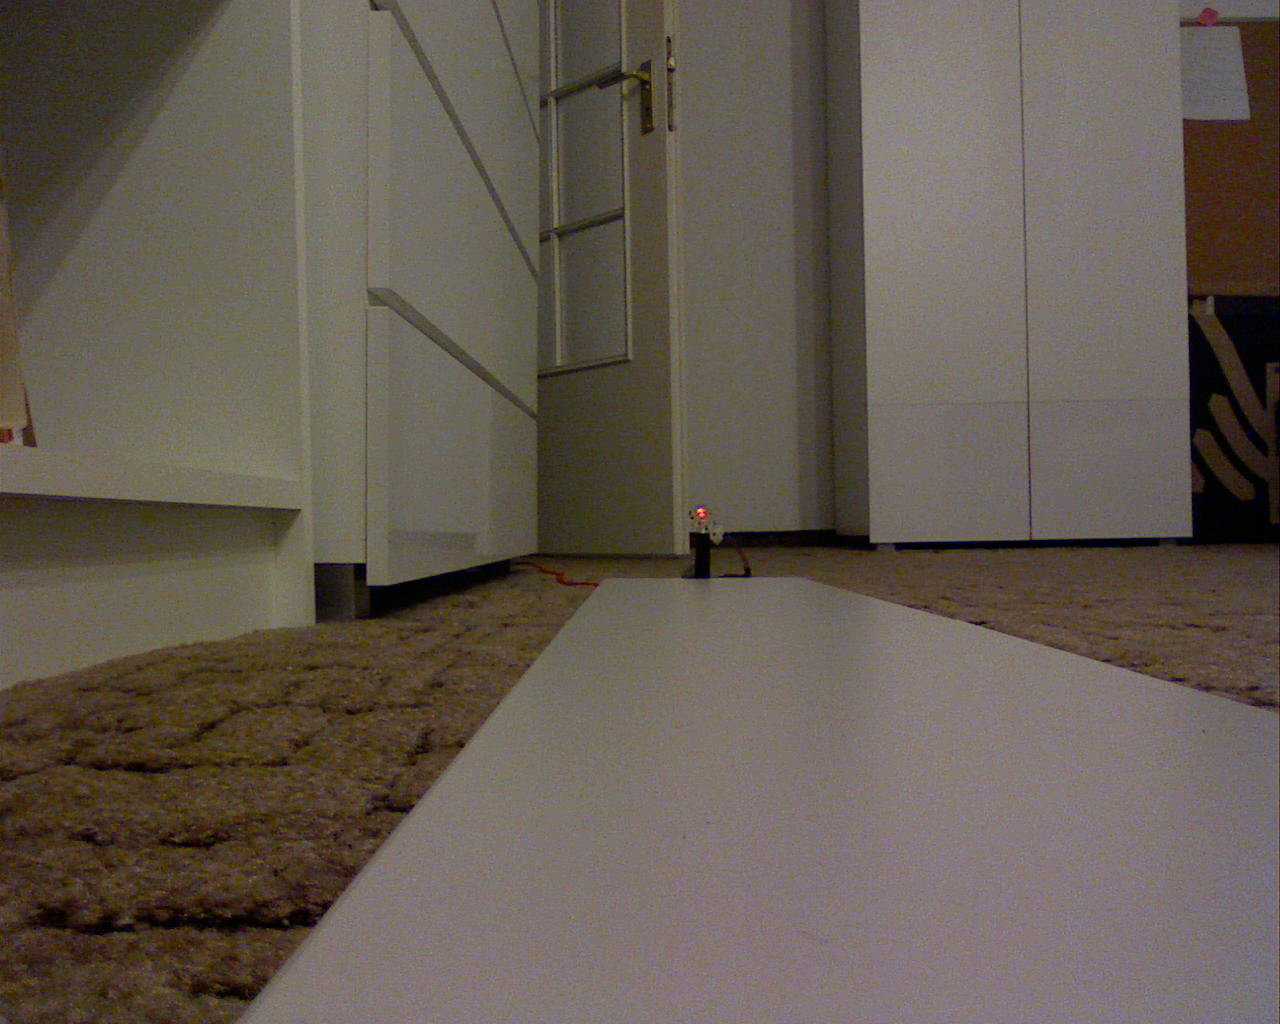

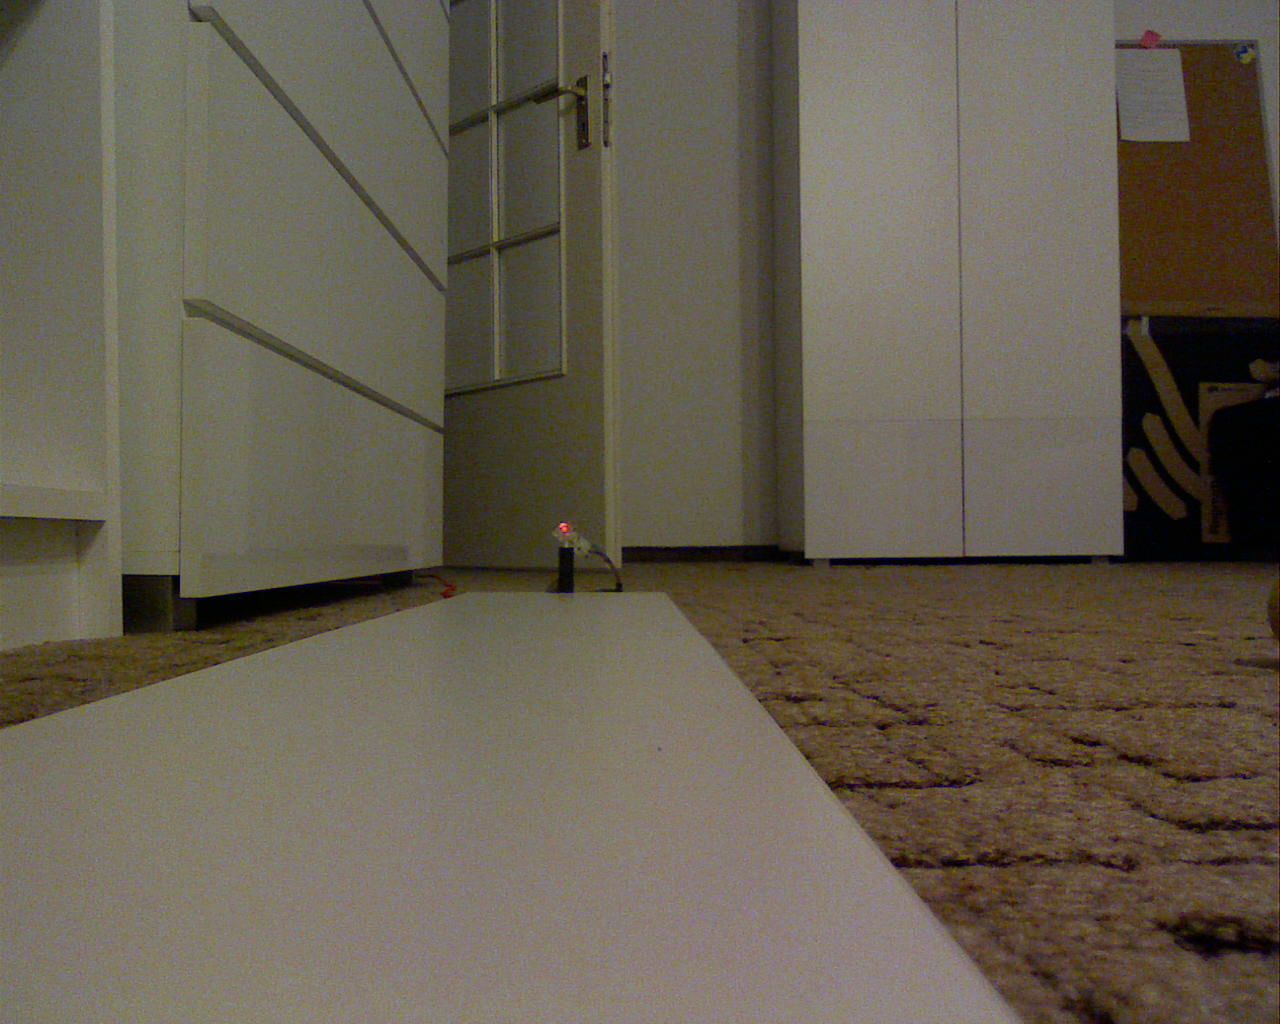

In [51]:
left, right = cv.imread("1/left.png"), cv.imread("1/right.png")

left_rgb = cv.cvtColor(left, cv.COLOR_BGR2RGB)
right_rgb = cv.cvtColor(right, cv.COLOR_BGR2RGB)

display(Image.fromarray(left_rgb))
display(Image.fromarray(right_rgb))

## 2.

In [52]:
left_gray = cv.cvtColor(left, cv.COLOR_BGR2GRAY)
right_gray = cv.cvtColor(right, cv.COLOR_BGR2GRAY)

left_threshold = cv.threshold(left_gray, 160, 255, cv.THRESH_BINARY)[1]
right_threshold = cv.threshold(right_gray, 160, 255, cv.THRESH_BINARY)[1]

In [53]:
left_dot_contours, _ = cv.findContours(left_threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
right_dot_contours, _ = cv.findContours(right_threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

x, y, w, h = cv.boundingRect(left_dot_contours[0])
left_point = (x + w // 2, y + h // 2)

x, y, w, h = cv.boundingRect(right_dot_contours[0])
right_point = (x + w // 2, y + h // 2)